In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://plot.ly/~f.hilitski/132.csv')
data.columns = ['time_stamp','voltage','click_type']

# clean data
data['time_stamp'] = data.time_stamp.apply(lambda x:pd.datetime.strptime(x.split('.')[0],'%Y-%m-%d %H:%M:%S'))
data['date'] = data.time_stamp.apply(lambda x:x.date())
data['hour'] = data.time_stamp.apply(lambda x:x.hour)



In [3]:
data.head()

,time_stamp,voltage,click_type,date,hour
0,2016-08-25 08:18:47,1704,1,2016-08-25,8
1,2016-08-25 08:19:02,1690,1,2016-08-25,8
2,2016-08-25 08:19:29,1674,1,2016-08-25,8
3,2016-08-25 08:19:55,1647,3,2016-08-25,8
4,2016-08-25 08:20:40,1660,2,2016-08-25,8


In [4]:
data['dummy'] = 1
agg = data.pivot_table(index='hour',columns='click_type',values='dummy',aggfunc=sum)
#fill zeroes in missing hours
agg = agg.append(pd.DataFrame([[0,0,0]]*5,index=range(2,7),columns=[1,2,3]))
agg.sort_index(inplace=True)

### Fiodar's button activity

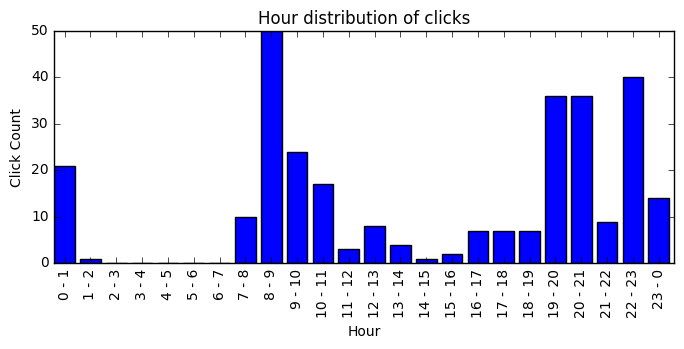

In [5]:
plt.figure(figsize=[8,3])
plt.bar(np.arange(24),agg.sum(axis=1))
plt.xticks(np.arange(24)+0.4,
           map(lambda x,y:str(x)+' - '+str(y),range(24),range(1,24)+[0]),
           rotation='vertical')
plt.xlabel('Hour')
plt.ylabel('Click Count')
plt.xlim([0,24])
plt.title('Hour distribution of clicks')
plt.show()

- It looks like Fiodar sleeps from 1AM to 7AM. That is only 6 hours of sleep per day while the [recommended](http://www.wsj.com/articles/sleep-experts-close-in-on-the-optimal-nights-sleep-1405984970)  number of hours of sleeps is 9 hours. 
- The button is most used in the morning and evening. This imply that the button is rarely used at work. Would I be wrong if I say that the button is programmed for some home tasks? Let's have a look at the distribution of the activity per weekday

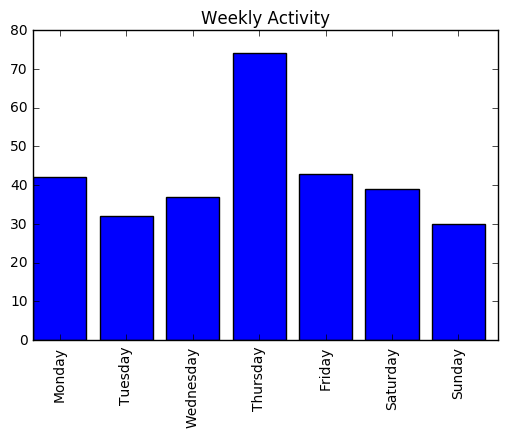

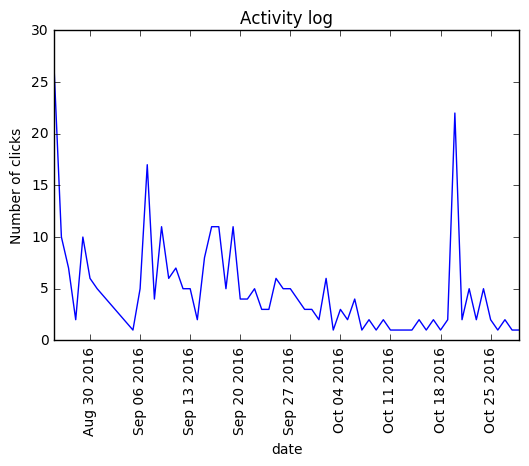

First day of activity was Thursday 2016-08-25
Other high activities are observed on:
Thursday 2016-08-25
Wednesday 2016-09-07
Friday 2016-09-09
Friday 2016-09-16
Saturday 2016-09-17
Monday 2016-09-19
Thursday 2016-10-20


In [6]:
weekdays = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
data['weekday'] = data.time_stamp.apply(lambda x:x.weekday())
agg2 = data.pivot_table(index='weekday',columns='click_type',values='dummy',aggfunc=sum)
plt.bar(range(7),agg2.sum(axis=1))
plt.xticks(np.arange(7)+0.4,map(lambda x:weekdays[x],range(7)),rotation='vertical')
plt.title('Weekly Activity')
plt.show()

agg3 = data[['date','dummy']].groupby('date').sum()
agg3.dummy.plot()
plt.xticks(rotation='vertical')
plt.ylabel('Number of clicks')
plt.title('Activity log')
plt.show()
print "First day of activity was",weekdays[agg3.index[0].weekday()], agg3.index[0]
print "Other high activities are observed on:"
high_act = agg3[agg3.dummy>10]
for d in agg3[agg3.dummy>10].index:
    print weekdays[d.weekday()],d

- The above chart shows a high activity on Thursday. However, a carefull look at the log activity, shows that Thursday was the day the button was programmed. Hence, it wouldn't make sense to conclude that Thursday is the most active day for Fiodar's button. Besides, Fiodar's activity is revealed uniform over the week
- The chart of the daily log shows few periodic peaks at the beginning. At the end the log looks stable. 
- Briefly, there possibilities that Fiodar makes some updates on his button on a monthly basis. If I disregard the activity during the updates, on average, Fiodar makes 2-3 clicks per day.

- **Now the question is "Can one guess what tasks the button is programmed to do?"**

### Guessing the button's tasks

So far we have seen that the log has recorded many clicks in the morning and evening and that the button is used for home activities. So, what kind of activity are done in the morning and evening? 

Eventually, there will be 3 different tasks since 3 types of clicks were recorded.

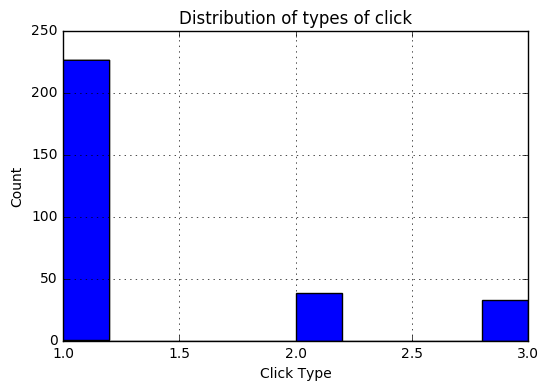

In [7]:
data.click_type.hist()
plt.xlabel('Click Type')
plt.ylabel('Count')
plt.title('Distribution of types of click')
plt.show()

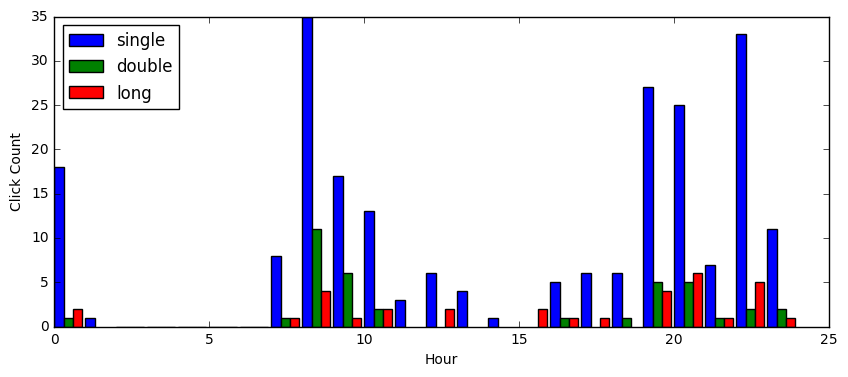

In [8]:
plt.figure(figsize=[10,4])
plt.bar(np.arange(24),agg[1],width=.3)
plt.bar(np.arange(24)+0.3,agg[2],width=.3,color='green')
plt.bar(np.arange(24)+0.6,agg[3],width=.3,color='red')
plt.legend(['single','double','long'],loc=2)
plt.xlabel('Hour')
plt.ylabel('Click Count')
plt.show()

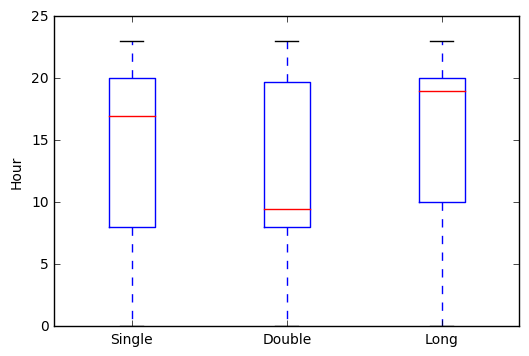

In [9]:
plt.boxplot(x = [data[data.click_type==1].hour.values,
                 data[data.click_type==2].hour.values,
                 data[data.click_type==3].hour.values],
            positions=[1,2,3])
plt.xticks([1,2,3],['Single','Double','Long'])
plt.ylabel('Hour')
plt.show()